In [ ]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.build(input_shape=(None, max_len))

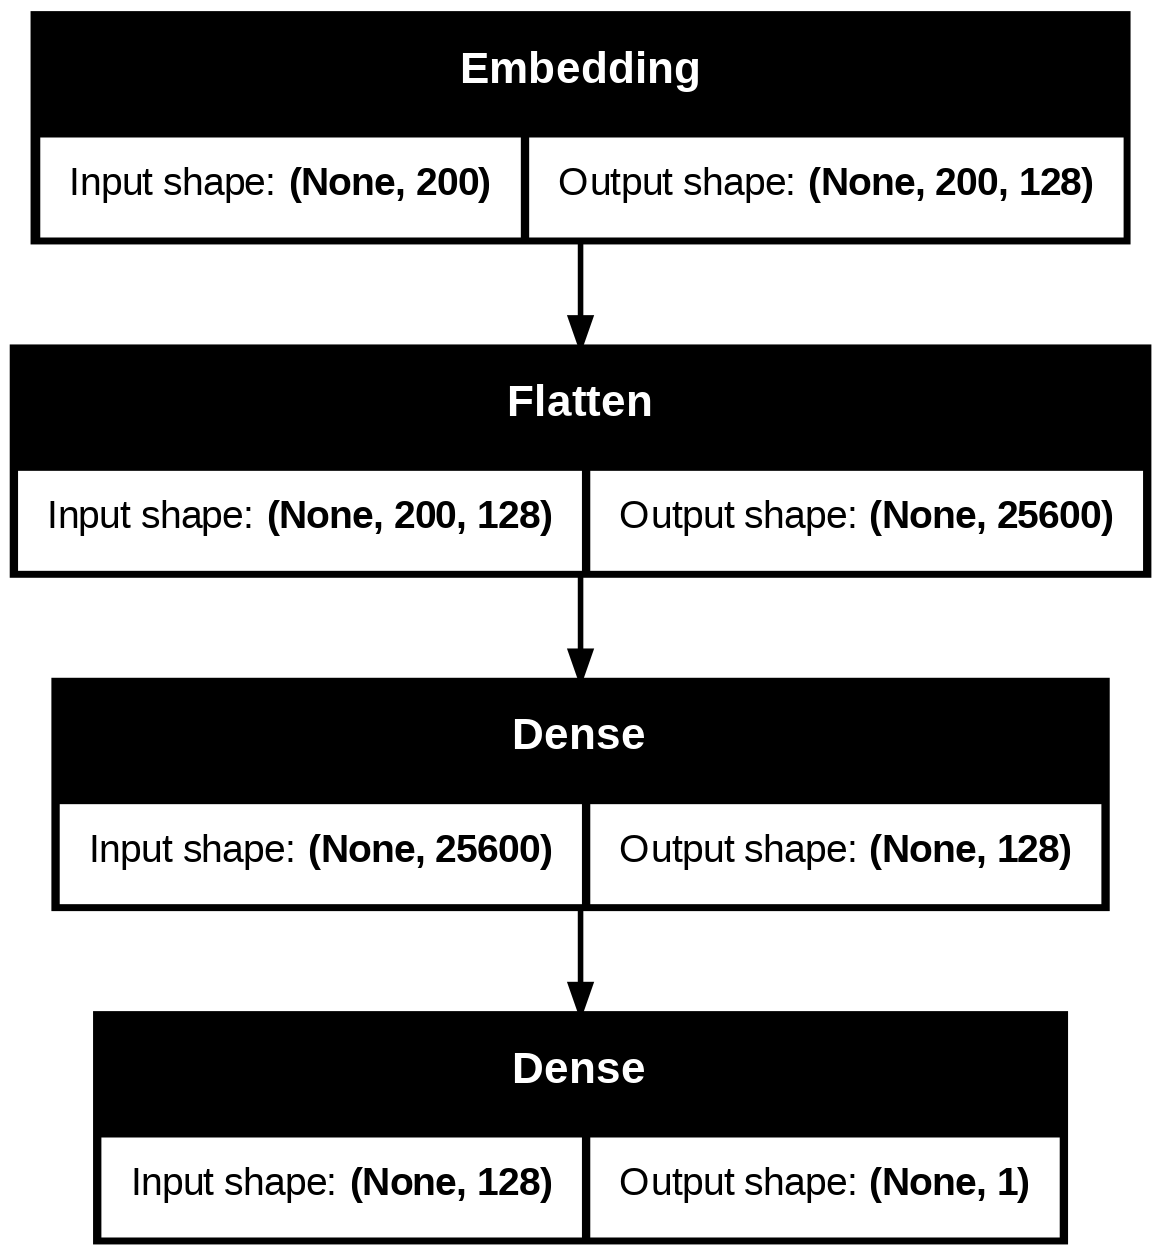

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,557,057 (17.38 MB)

 Trainable params: 4,557,057 (17.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6745 - loss: 0.5567 - val_accuracy: 0.8576 - val_loss: 0.3263
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9689 - loss: 0.1001 - val_accuracy: 0.8424 - val_loss: 0.4112
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9975 - loss: 0.0144 - val_accuracy: 0.8357 - val_loss: 0.5189
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9995 - loss: 0.0033 - val_accuracy: 0.8490 - val_loss: 0.5229
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 4.7130e-04 - val_accuracy: 0.8516 - val_loss: 0.5375


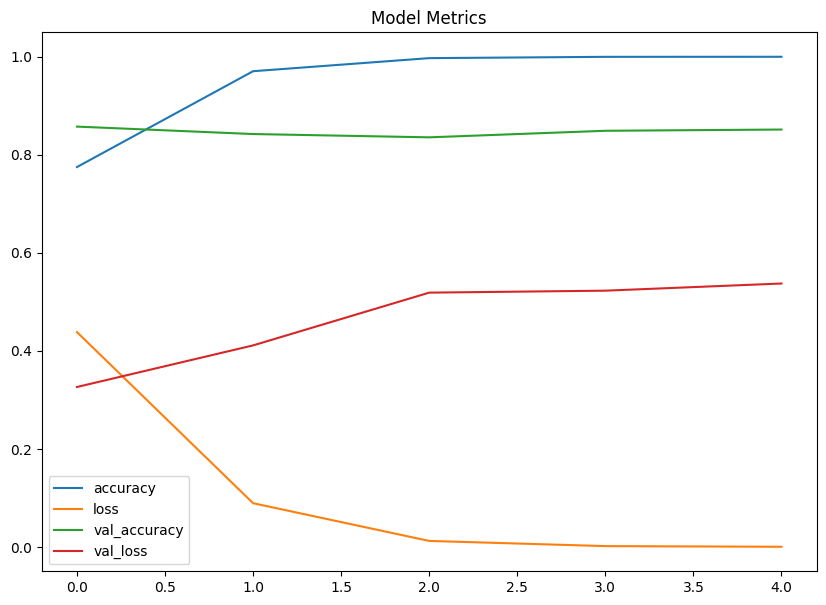

In [ ]:

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8515 - loss: 0.5422
Test Accuracy: 0.8515599966049194


In [ ]:
y_pred = model.predict(x_test)
y_pred


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.00683013],
       [0.99999213],
       [0.07813504],
       ...,
       [0.01886748],
       [0.06565823],
       [0.7316666 ]], dtype=float32)

In [ ]:
y_pred = y_pred.flatten()
y_pred

array([0.00683013, 0.99999213, 0.07813504, ..., 0.01886748, 0.06565823,
       0.7316666 ], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



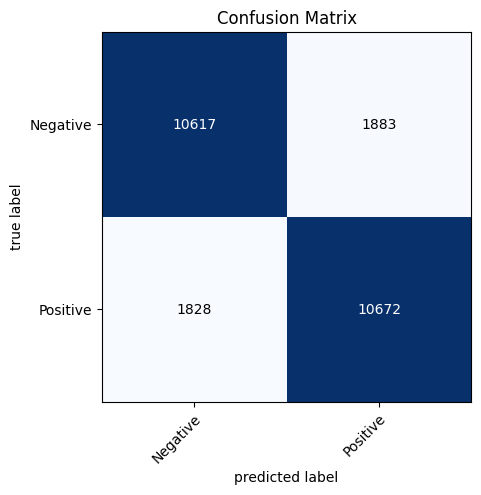

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()